## Version H of this sequence is just Justin getting back into the project after a multi-month absence 
### This was copied from vE as PandasOnRay or vG didn't work well.

In [31]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
# import welly
# from welly import Well
# import lasio
import glob
from sklearn import neighbors
import pickle
import math
import dask
import dask.dataframe as dd
from dask.distributed import Client
# import pdvega
# import vega
import dask.dataframe as dd
from dask.distributed import Client
# welly.__version__

In [32]:
print(dask.__version__)
print(pd.__version__)

0.18.1
0.19.2


In [33]:
%%timeit
import os
env = %env


78.8 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
from IPython.display import display

In [35]:
#### Test results Part 1
#### Had to change display options to get this to print in full!
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100000

height has been deprecated.



## We're going to load a pickle file of a previously created dataframe

### The dataframe merges:
1. picks_dic = pd.read_csv('../../SPE_006_originalData/OilSandsDB/PICKS_DIC.TXT',delimiter='\t')
2. picks = pd.read_csv('../../SPE_006_originalData/OilSandsDB/PICKS.TXT',delimiter='\t')
3. wells = pd.read_csv('../../SPE_006_originalData/OilSandsDB/WELLS.TXT',delimiter='\t')
4. gis = pd.read_csv('../../well_lat_lng.csv')

### It also excludes any wells that have nulls or zeros for Top McMurray or Base McMurray picks
This was done in notebooks: 
1. notebooks_2018/mapmaking/Map_Exploration_v2-KDtree.ipynb
2. notebooks_2018/Test_RUN_2018_02/DataCleaningPrepof_KNN_neighborPickDepth_df_creation_vA_20180210

### Let's load in the pickle file of the dataframe from previous notebook mentioned above

In [37]:
wells_df_new_cleaned_plus_nn_wNoNulls =  pd.read_pickle('wells_df_new_cleaned_plus_nn_wNoNulls.p')

ImportError: cannot import name 're_type'

In [7]:
wells_df_new_cleaned_plus_nn_wNoNulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2192
Data columns (total 16 columns):
SitID                                  1921 non-null int64
McMurray_Base_HorID                    1921 non-null int64
McMurray_Top_HorID                     1921 non-null int64
McMurray_Base_DEPTH                    1921 non-null float64
McMurray_Top_DEPTH                     1921 non-null float64
McMurray_Base_Qual                     1921 non-null int64
McMurray_Top_Qual                      1921 non-null int64
lat                                    1921 non-null float64
lng                                    1921 non-null float64
UWI                                    1921 non-null object
Neighbors_Obj                          1921 non-null object
NN1_McMurray_Top_DEPTH                 1921 non-null float64
NN1_McMurray_Base_DEPTH                1921 non-null float64
NN1_thickness                          1921 non-null float64
MM_Top_Depth_predBy_NN1thick           1921 non-nul

In [8]:
wells_df_new_cleaned_plus_nn_wNoNulls.head()

,SitID,McMurray_Base_HorID,McMurray_Top_HorID,McMurray_Base_DEPTH,McMurray_Top_DEPTH,McMurray_Base_Qual,McMurray_Top_Qual,lat,lng,UWI,Neighbors_Obj,NN1_McMurray_Top_DEPTH,NN1_McMurray_Base_DEPTH,NN1_thickness,MM_Top_Depth_predBy_NN1thick,MM_Top_Depth_Real_v_predBy_NN1thick
0,102496,14000,13000,561.0,475.0,1,3,54.785907,-110.129320,00/12-08-067-01W4/0,"[{'distance': 0.05753100195547899, 'neighbor':...",544.0,630.0,86.0,475.0,0.0
1,102497,14000,13000,604.5,515.0,1,3,54.782284,-110.269446,00/07-08-067-02W4/0,"[{'distance': 0.04734000608365529, 'neighbor':...",529.0,613.0,84.0,520.5,-5.5
2,102498,14000,13000,564.0,480.0,1,3,54.785892,-110.186851,00/09-11-067-02W4/0,"[{'distance': 0.05753100195547899, 'neighbor':...",529.0,613.0,84.0,480.0,0.0
3,102500,14000,13000,636.5,549.0,1,3,54.829624,-110.269422,00/10-29-067-02W4/0,"[{'distance': 0.04355700607250212, 'neighbor':...",529.0,613.0,84.0,552.5,-3.5
4,102501,14000,13000,613.0,529.0,1,2,54.840471,-110.224832,00/06-34-067-02W4/0,"[{'distance': 0.04589036401030715, 'neighbor':...",514.0,603.0,89.0,524.0,5.0


In [9]:
print(len(wells_df_new_cleaned_plus_nn_wNoNulls))

1921


In [10]:
wells_df_new_cleaned_plus_nn_wNoNulls.head()

,SitID,McMurray_Base_HorID,McMurray_Top_HorID,McMurray_Base_DEPTH,McMurray_Top_DEPTH,McMurray_Base_Qual,McMurray_Top_Qual,lat,lng,UWI,Neighbors_Obj,NN1_McMurray_Top_DEPTH,NN1_McMurray_Base_DEPTH,NN1_thickness,MM_Top_Depth_predBy_NN1thick,MM_Top_Depth_Real_v_predBy_NN1thick
0,102496,14000,13000,561.0,475.0,1,3,54.785907,-110.129320,00/12-08-067-01W4/0,"[{'distance': 0.05753100195547899, 'neighbor':...",544.0,630.0,86.0,475.0,0.0
1,102497,14000,13000,604.5,515.0,1,3,54.782284,-110.269446,00/07-08-067-02W4/0,"[{'distance': 0.04734000608365529, 'neighbor':...",529.0,613.0,84.0,520.5,-5.5
2,102498,14000,13000,564.0,480.0,1,3,54.785892,-110.186851,00/09-11-067-02W4/0,"[{'distance': 0.05753100195547899, 'neighbor':...",529.0,613.0,84.0,480.0,0.0
3,102500,14000,13000,636.5,549.0,1,3,54.829624,-110.269422,00/10-29-067-02W4/0,"[{'distance': 0.04355700607250212, 'neighbor':...",529.0,613.0,84.0,552.5,-3.5
4,102501,14000,13000,613.0,529.0,1,2,54.840471,-110.224832,00/06-34-067-02W4/0,"[{'distance': 0.04589036401030715, 'neighbor':...",514.0,603.0,89.0,524.0,5.0


In [11]:
df_new = wells_df_new_cleaned_plus_nn_wNoNulls
# df_new["UWI (AGS)"] = df_new["UWI (AGS)_x"]
df_new["UWI"] = df_new["UWI"]
df_new["HorID"] = df_new["McMurray_Top_HorID"]
df_new["Pick"] = df_new["McMurray_Top_DEPTH"]
df_new["Quality"] = df_new["McMurray_Top_Qual"]
df_new["HorID_paleoz"] = df_new["McMurray_Base_HorID"]
df_new["Pick_paleoz"] = df_new["McMurray_Base_DEPTH"]
df_new["Quality_paleoz"] = df_new["McMurray_Base_Qual"]
df_new = df_new[["SitID","UWI","HorID","Pick","Quality","HorID_paleoz","Pick_paleoz","Quality_paleoz",'lat','lng','MM_Top_Depth_predBy_NN1thick','NN1_thickness']]
df_new

,SitID,UWI,HorID,Pick,Quality,HorID_paleoz,Pick_paleoz,Quality_paleoz,lat,lng,MM_Top_Depth_predBy_NN1thick,NN1_thickness
0,102496,00/12-08-067-01W4/0,13000,475.00,3,14000,561.00,1,54.785907,-110.129320,475.00,86.00
1,102497,00/07-08-067-02W4/0,13000,515.00,3,14000,604.50,1,54.782284,-110.269446,520.50,84.00
2,102498,00/09-11-067-02W4/0,13000,480.00,3,14000,564.00,1,54.785892,-110.186851,480.00,84.00
3,102500,00/10-29-067-02W4/0,13000,549.00,3,14000,636.50,1,54.829624,-110.269422,552.50,84.00
4,102501,00/06-34-067-02W4/0,13000,529.00,2,14000,613.00,1,54.840471,-110.224832,524.00,89.00
5,102503,00/11-04-067-03W4/0,13000,488.50,2,14000,553.50,1,54.771449,-110.402983,489.00,64.50
6,102505,00/10-08-067-03W4/0,13000,501.50,2,14000,572.50,1,54.785901,-110.422131,508.00,64.50
7,102507,00/10-14-067-03W4/0,13000,553.50,2,14000,606.50,1,54.800533,-110.345762,542.00,64.50
8,102514,00/10-28-067-03W4/0,13000,493.50,3,14000,558.00,1,54.829633,-110.396621,487.00,71.00
9,102517,00/07-36-067-03W4/0,13000,536.50,2,14000,615.00,1,54.840441,-110.320301,562.00,53.00


In [12]:
print(len(df_new))

1921


In [13]:
#### Number of unique wells based on UWI
len(df_new.UWI.unique())

1921

In [14]:
df_new_test = df_new[['UWI']]

In [15]:
print(any(df_new_test.UWI == '00/11-04-067-03W4/0'))

True


## Brainstorm 1 : various features to extract
1. Find average values of [each curve] in [different] length windows [above, around, below] a depth
2. Find average for [different number of] [max, min] values in [different] length windows [above, around, below] a depth for [each curve]
3. Find gradient within [window length] around a depth point 
4. Find [min, avg, max] gradient of various [smaller window length] within a larger [larger window length]
5. Find number of gradient changes (negative to positive) of various [smaller window length] within a larger [larger window length]
6. Find difference between two windows on either side of a given depth. For each window, average for [different number of] [max, min] values in [different] length windows above & below a given depth for [each curve].

In [16]:
####
def addColWindowMean(df,col,windowSize,centered):
    featureName = col+"_mean_"+str(windowSize)+"winSize_"+"dir"+centered
    if(centered == "around"):
        df[featureName] = df[col].rolling(center=True,window=windowSize).mean() 
    elif(centered == "above"):
        df[featureName] = df[col].rolling(center=False,window=windowSize).mean() 
    elif(centered == "below"):
        #### reverse data frame
        #df = df.iloc[::-1]
        df = df.sort_index(ascending=False)
        df[featureName] = df[col].rolling(center=False,window=windowSize).mean() 
        #### unreverse
        df = df.sort_index(ascending=True)
    return df

In [17]:
####
def addColWindowMax(df,col,windowSize,centered):
    featureName = col+"_max_"+str(windowSize)+"winSize_"+"dir"+centered
    if(centered == "around"):
        df[featureName] = df[col].rolling(center=True,window=windowSize).max() 
    elif(centered == "above"):
        df[featureName] = df[col].rolling(center=False,window=windowSize).max() 
    elif(centered == "below"):
        #### reverse data frame
        #df = df.iloc[::-1]
        df = df.sort_index(ascending=False)
        df[featureName] = df[col].rolling(center=False,window=windowSize).max() 
        #### unreverse
        df = df.sort_index(ascending=True)
    return df

In [18]:
#### Returns a column with the min values of a window centered 
def addColWindowMin(df,col,windowSize,centered):
    featureName = col+"_min_"+str(windowSize)+"winSize_"+"dir"+centered
    if(centered == "around"):
        df[featureName] = df[col].rolling(center=True,window=windowSize).min() 
    elif(centered == "above"):
        df[featureName] = df[col].rolling(center=False,window=windowSize).min() 
    elif(centered == "below"):
        #### reverse data frame
        #df = df.iloc[::-1]
        df = df.sort_index(ascending=False)
        df[featureName] = df[col].rolling(center=False,window=windowSize).min() 
        #### unreverse
        
        df = df.sort_index(ascending=True)
    return df

In [19]:
#### helper function that takes in array and an integer for the number of highest values to find the mean of 
#### example: for an array = [1,3,6,44,33,22,452] and nValues = 2, the answer would be 44+452 / 2
def nLargest(array,nValues):
    answer = np.mean(array[np.argsort(array)[-nValues:]])  
    return answer

In [20]:
#### Returns a column with the average of the N largest values of a window 
def addColWindowAvgMaxNvalues(df,col,windowSize,centered,nValues):
    #df[featureName] = df[col].rolling(center=True,window=windowSize).nlargest(nValues).mean() 
    #return df
    featureName = col+"_min_"+str(windowSize)+"winSize_"+"dir"+centered+"_n"+str(nValues)
    if(centered == "around"):
        #df[featureName] = df[col].rolling(center=True,window=windowSize).nlargest(nValues).mean() 
        df[featureName] = df[col].rolling(center=True,window=windowSize).apply(lambda x: nLargest(x,nValues))
    elif(centered == "above"):
        df[featureName] = df[col].rolling(center=False,window=windowSize).apply(lambda x: nLargest(x,nValues))
    elif(centered == "below"):
        #### reverse data frame
        #df = df.iloc[::-1]
        df = df.sort_index(ascending=False)
        #   # df['new_column'] = df.apply(lambda x: your_function(x['High'],x['Low'],x['Close']), axis=1)
        df[featureName] = df[col].rolling(center=False,window=windowSize).apply(lambda x: nLargest(x,nValues))
        #df[featureName] = df[col].rolling(center=False,window=windowSize).nlargest(nValues).mean() 
        #### unreverse
        df = df.sort_index(ascending=True)
    return df

In [21]:
#### Takes MM_Top_Depth_predBy_NN1thick and subtracts depth at that point, returns value
def NN1_TopMcMDepth(df,MM_Top_Depth_predBy_NN1thick):
    df['DistFrom_NN1_TopDepth'] = df[MM_Top_Depth_predBy_NN1thick] - df['DEPT'] 
    return df


In [22]:
#### Takes MM_Top_Depth_predBy_NN1thick and subtracts depth at that point, returns *absolute* value
def NN1_TopMcMDepth_Abs(df,MM_Top_Depth_predBy_NN1thick):
    df['DistFrom_NN1_TopDepth_Abs'] = math.fabs(df[MM_Top_Depth_predBy_NN1thick] - df['DEPT'])
    return df

In [23]:
####
winVars = {"RangeOfCurves":['GR'],
                   "RangeOfWindows":[5,11,29],
                   "RangeOfWindowsCaution":[5],
                   "RangeOfDirection":['above','below','around'],
                   "MinOrMaxRange":['min','max'],
                   "NumbPtsRange":[1,5]}

## Read in well logs from LAS files and put into Dictionary of Dataframes. As Reading-in, add features

In [1]:
def loadAndAddFeatures():
    count=0
    data_df=[]
    count_limit =1663
    list_of_failed_wells = []
    ### dictionary that holds every well as key:value or "UWI":df pair
    df_w_dict ={}
    while count < count_limit:
        for file in glob.glob('../../SPE_006_originalData/OilSandsDB/Logs/*.LAS'):
            #### NOTE: limiting wells being read-in to 101 here !!!!!!!!!!!!!!!!
            count+=1
            if count > count_limit:
                print("hit limit of count below file for loop")
                answer = [df_w_dict,list_of_failed_wells]
                return answer
            else:
                l_df = lasio.read(file).df()
                
                str_uwi= file[-23:-4].replace("-", "/",1)[:17]+file[-6:-4].replace("-", "/",1)
                #l_df.DEPT = l_df.DEPT.astype(float)
                ##bottom_well_depth = l_df['DEPT'].max()
                if any(df_new.UWI == str_uwi):
                    if df_new[df_new['UWI']==str_uwi]['Quality'].iloc[0] > -1:
                        l_df = l_df.reset_index()
                        print(l_df['DEPT'])
                        print("got to UWI apppend")
                        l_df['UWI'] = str_uwi
                        print("UWI added is ",str_uwi," and type is ",type(str_uwi))
                        l_df['SitID']=df_new[df_new['UWI']==str_uwi]['SitID'].iloc[0]
#                         l_df['UWI (AGS)']=df_new[df_new['UWI']==str_uwi]['UWI (AGS)'].iloc[0]
                        l_df['Pick']=df_new[df_new['UWI']==str_uwi]['Pick'].iloc[0] 
                        l_df['HorID']=df_new[df_new['UWI']==str_uwi]['HorID'].iloc[0]
                        l_df['Quality']=df_new[df_new['UWI']==str_uwi]['Quality'].iloc[0]
                        #### adding in paleozoic surface pick
                        l_df['Pick_paleoz']=df_new[df_new['UWI']==str_uwi]['Pick_paleoz'].iloc[0] 
                        l_df['HorID_paleoz']=df_new[df_new['UWI']==str_uwi]['HorID_paleoz'].iloc[0]
                        l_df['Quality_paleoz']=df_new[df_new['UWI']==str_uwi]['Quality_paleoz'].iloc[0]
                        
                        #### new as of 2018-02
                        l_df['MM_Top_Depth_predBy_NN1thick']=df_new[df_new['UWI']==str_uwi]['MM_Top_Depth_predBy_NN1thick'].iloc[0]
                        l_df['NN1_thickness']=df_new[df_new['UWI']==str_uwi]['NN1_thickness'].iloc[0]
                        
                        print(l_df)
                        print("got to end of col append & pick is ",l_df.Pick.unique()[0])  
                        try:
                            print("in first try statement, count = ",count)
                            float(l_df.Pick.unique()[0])
                            l_df.Pick = l_df.Pick.astype(float)
                            l_df.DEPT = l_df.DEPT.astype(float)
                            l_df['new_pick']=l_df['Pick']-l_df['DEPT']
#                             l_df['new_pick2']=l_df['new_pick'].apply(lambda x: 1 if(x==0) else 0)
                            l_df['new_pick2']=l_df['new_pick'].apply(lambda x: 10 if x==0 else ( 5 if (-5 < x and x <5) else 0))
#                             lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)
                            #### doing the same as below but for BASE mcMurray or Paleozoic surface pick
                            float(l_df.Pick_paleoz.unique()[0])
                            l_df.Pick_paleoz = l_df.Pick_paleoz.astype(float)
                            #l_df.DEPT = l_df.DEPT.astype(float)
                            l_df['new_pick_paleoz']=l_df['Pick_paleoz']-l_df['DEPT']
                            l_df['new_pick2_paleoz']=l_df['new_pick_paleoz'].apply(lambda x: 1 if(x==0) else 0)
                            
                            #### new as of 2018-02
                            try:
                                l_df_new = NN1_TopMcMDepth(l_df,'MM_Top_Depth_predBy_NN1thick')
                            except:
                                    pass
                            try:
                                l_df_new = NN1_TopMcMDepth_Abs(l_df,'MM_Top_Depth_predBy_NN1thick')
                            except:
                                    pass
                            
                            print("got to below astype part")
                            #### instead of concat into a single dataframe, run functions & then add to dictionary   
                            ##### run functions to create features on array basis for each well in separate dataframe
                            ##### this makes certain things easier, compared to everything in a single dataframe, like making sure you don't accidentally grab data from next well up
                            ##### and will make it easier to write data back to LAS if we run into memory limitations later
                            curves = ['GR','ILD']
                            windows = [5,7,11,21]
                            directions = ["around","below","above"]
                            comboArg_A = [curves,windows,directions]
                            all_comboArgs_A = list(itertools.product(*comboArg_A))
                            for eachArgList in all_comboArgs_A:
                                try:
                                    l_df_new = addColWindowMean(l_df,eachArgList[0],eachArgList[1],eachArgList[2])
                                except:
                                    pass
                                try:
                                    l_df_new = addColWindowMax(l_df,eachArgList[0],eachArgList[1],eachArgList[2])
                                except:
                                    pass
                                try:
                                    l_df_new = addColWindowMin(l_df,eachArgList[0],eachArgList[1],eachArgList[2])
                                except:
                                    pass
                                try:
                                    l_df_new = addColWindowAvgMaxNvalues(l_df,eachArgList[0],eachArgList[1],eachArgList[2],3)
                                except:
                                    pass
                            #### add resultant dataframe to dictionary
                            if l_df['DEPT'].max() < 600:
                                df_w_dict[l_df_new['UWI'][0]]= l_df_new
                        except ValueError as e:
                            print("e = ",e)
                            print ('Error picking')
                            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
                            message = template.format(type(e).__name__, e.args)
                            print("message = ",message)
                            print("file = ",file)
                            print("Got except, UWI added is ",str_uwi," and type is ",type(str_uwi))
                            list_of_failed_wells.append(str_uwi)
                            #continue;
                    else:
                        pass
                else:
                    pass
            #print("result = ",df_w_dict)
    #else: 
    #    return df_w_dict, list_of_failed_wells
    answer = [df_w_dict,list_of_failed_wells]
    
    return answer

In [2]:
## %timeit
answer = loadAndAddFeatures()

NameError: name 'glob' is not defined

In [36]:
#answer=[df_w_dict,list_of_failed_wells]
df_w_dict = answer[0]
list_of_failed_wells = answer[1]

In [37]:
#### dumping dict of data frame to pickle file
wells_and_features_20180210 = df_w_dict
pickle.dump(wells_and_features_20180210, open( "dict_of_df_wells_and_features_class3_20180211.p", "wb" ) )

## SKIPPING EVERYTHING ABOVE AND STARTING HERE

In [30]:
df_w_dict =  pd.read_pickle('dict_of_df_wells_and_features_class3_20180211.p')

ImportError: cannot import name 're_type'

### NOTE: not all well logs were read-in successfully, need to go back and find out why

In [7]:
print(df_w_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [8]:
print("list_of_failed_wells",list_of_failed_wells)

NameError: name 'list_of_failed_wells' is not defined

In [9]:
df_w_dict['00/04-13-077-05W4/0']

,DEPT,ILD,DPHI,NPHI,GR,UWI,SitID,Pick,HorID,Quality,...,ILD_min_11winSize_dirabove,ILD_min_11winSize_dirabove_n3,ILD_mean_21winSize_diraround,ILD_max_21winSize_diraround,ILD_min_21winSize_diraround,ILD_min_21winSize_diraround_n3,ILD_mean_21winSize_dirabove,ILD_max_21winSize_dirabove,ILD_min_21winSize_dirabove,ILD_min_21winSize_dirabove_n3
0,165.00,2.808,0.280,0.542,104.464,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,165.25,2.811,0.276,0.536,105.686,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,165.50,2.922,0.273,0.533,107.521,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,165.75,2.979,0.271,0.530,105.102,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,166.00,2.983,0.260,0.526,99.650,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,166.25,2.986,0.220,0.530,95.410,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,166.50,3.103,0.182,0.527,92.997,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,166.75,3.225,0.191,0.500,92.402,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,167.00,3.352,0.223,0.490,98.490,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,167.25,3.485,0.251,0.506,100.925,00/04-13-077-05W4/0,142544,336.0,13000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## testing one dataframe of one well in dictionary of all that were successfully read in
df_w_dict['00/01-03-085-15W4/0'].shape

(518, 84)

In [11]:
print(len(df_w_dict))

1109


## Turn dictionary of dataframes into single dataframe

In [12]:
def turnDictofDFtoDF(dict_of_df):
    data_df = pd.DataFrame()
    list_of_df = []
    values = dict_of_df.values()
    for each in values:
        list_of_df.append(each)
    data_df = pd.concat(list_of_df)
    return data_df
        

In [13]:
data_df = turnDictofDFtoDF(df_w_dict)
data_df.shape

/Users/justingosses/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  import sys


(922272, 93)

In [14]:
type(data_df)

pandas.core.frame.DataFrame

In [15]:
#### dumpingdata frame to pickle file
df_wells_and_features_20180210 = data_df
pickle.dump(df_wells_and_features_20180210, open( "df_wells_and_features_class3_20180211_qual_all.p", "wb" ) )

In [16]:
paleozoic_pick_test = data_df['new_pick_paleoz'][1800:2000]
paleozoic_pick_test

43     197.734
44     197.484
45     197.234
46     196.984
47     196.734
48     196.484
49     196.234
50     195.984
51     195.734
52     195.484
53     195.234
54     194.984
55     194.734
56     194.484
57     194.234
58     193.984
59     193.734
60     193.484
61     193.234
62     192.984
63     192.734
64     192.484
65     192.234
66     191.984
67     191.734
68     191.484
69     191.234
70     190.984
71     190.734
72     190.484
        ...   
213    155.234
214    154.984
215    154.734
216    154.484
217    154.234
218    153.984
219    153.734
220    153.484
221    153.234
222    152.984
223    152.734
224    152.484
225    152.234
226    151.984
227    151.734
228    151.484
229    151.234
230    150.984
231    150.734
232    150.484
233    150.234
234    149.984
235    149.734
236    149.484
237    149.234
238    148.984
239    148.734
240    148.484
241    148.234
242    147.984
Name: new_pick_paleoz, Length: 200, dtype: float64

## Key variables that hold data frame column names

In [17]:
keys = ['ILD','DPHI','GR','NPHI','CALI','COND','DELT','RHOB','PHIN','DT','ILM','SP','SFLU','IL','DEPTH','DEPH','MD']

In [18]:
keys2 = ['ILD','DPHI','GR','NPHI','CALI','RHOB']

Adding deritive features

In [19]:
all_col_names = list(df_w_dict['00/04-13-077-05W4/0'])
all_col_names

['DEPT',
 'ILD',
 'DPHI',
 'NPHI',
 'GR',
 'UWI',
 'SitID',
 'Pick',
 'HorID',
 'Quality',
 'Pick_paleoz',
 'HorID_paleoz',
 'Quality_paleoz',
 'MM_Top_Depth_predBy_NN1thick',
 'NN1_thickness',
 'new_pick',
 'new_pick2',
 'new_pick_paleoz',
 'new_pick2_paleoz',
 'DistFrom_NN1_TopDepth',
 'GR_mean_5winSize_diraround',
 'GR_max_5winSize_diraround',
 'GR_min_5winSize_diraround',
 'GR_min_5winSize_diraround_n3',
 'GR_mean_5winSize_dirabove',
 'GR_max_5winSize_dirabove',
 'GR_min_5winSize_dirabove',
 'GR_min_5winSize_dirabove_n3',
 'GR_mean_7winSize_diraround',
 'GR_max_7winSize_diraround',
 'GR_min_7winSize_diraround',
 'GR_min_7winSize_diraround_n3',
 'GR_mean_7winSize_dirabove',
 'GR_max_7winSize_dirabove',
 'GR_min_7winSize_dirabove',
 'GR_min_7winSize_dirabove_n3',
 'GR_mean_11winSize_diraround',
 'GR_max_11winSize_diraround',
 'GR_min_11winSize_diraround',
 'GR_min_11winSize_diraround_n3',
 'GR_mean_11winSize_dirabove',
 'GR_max_11winSize_dirabove',
 'GR_min_11winSize_dirabove',
 'GR_

In [20]:
# DistFrom_NN1_TopDepth_Abs
features2original = ['CALI','DEPT','DPHI','GR','ILD','NPHI', 'SitID','CALIder','DPHIder','GRder','ILDder']
features2 = [
    #'DEPT',
 'DPHI',
 'NPHI',
 'GR',
 'ILD',
 'SitID',
#  'DistFrom_NN1_TopDepth_Abs',
 'DistFrom_NN1_TopDepth',
 'NN1_thickness',
 'new_pick_paleoz',
 'GR_mean_5winSize_diraround',
 'GR_max_5winSize_diraround',
 'GR_min_5winSize_diraround',
 'GR_min_5winSize_diraround_n3',
 'GR_mean_5winSize_dirabove',
 'GR_max_5winSize_dirabove',
 'GR_min_5winSize_dirabove',
 'GR_min_5winSize_dirabove_n3',
 'GR_mean_7winSize_diraround',
 'GR_max_7winSize_diraround',
 'GR_min_7winSize_diraround',
 'GR_min_7winSize_diraround_n3',
 'GR_mean_7winSize_dirabove',
 'GR_max_7winSize_dirabove',
 'GR_min_7winSize_dirabove',
 'GR_min_7winSize_dirabove_n3',
 'GR_mean_11winSize_diraround',
 'GR_max_11winSize_diraround',
 'GR_min_11winSize_diraround',
 'GR_min_11winSize_diraround_n3',
 'GR_mean_11winSize_dirabove',
 'GR_max_11winSize_dirabove',
 'GR_min_11winSize_dirabove',
 'GR_min_11winSize_dirabove_n3',
 'GR_mean_21winSize_diraround',
 'GR_max_21winSize_diraround',
 'GR_min_21winSize_diraround',
 'GR_min_21winSize_diraround_n3',
 'GR_mean_21winSize_dirabove',
 'GR_max_21winSize_dirabove',
 'GR_min_21winSize_dirabove',
 'GR_min_21winSize_dirabove_n3',
 'ILD_mean_5winSize_diraround',
 'ILD_max_5winSize_diraround',
 'ILD_min_5winSize_diraround',
 'ILD_min_5winSize_diraround_n3',
 'ILD_mean_5winSize_dirabove',
 'ILD_max_5winSize_dirabove',
 'ILD_min_5winSize_dirabove',
 'ILD_min_5winSize_dirabove_n3',
 'ILD_mean_7winSize_diraround',
 'ILD_max_7winSize_diraround',
 'ILD_min_7winSize_diraround',
 'ILD_min_7winSize_diraround_n3',
 'ILD_mean_7winSize_dirabove',
 'ILD_max_7winSize_dirabove',
 'ILD_min_7winSize_dirabove',
 'ILD_min_7winSize_dirabove_n3',
 'ILD_mean_11winSize_diraround',
 'ILD_max_11winSize_diraround',
 'ILD_min_11winSize_diraround',
 'ILD_min_11winSize_diraround_n3',
 'ILD_mean_11winSize_dirabove',
 'ILD_max_11winSize_dirabove',
 'ILD_min_11winSize_dirabove',
 'ILD_min_11winSize_dirabove_n3',
 'ILD_mean_21winSize_diraround',
 'ILD_max_21winSize_diraround',
 'ILD_min_21winSize_diraround',
 'ILD_min_21winSize_diraround_n3',
 'ILD_mean_21winSize_dirabove',
 'ILD_max_21winSize_dirabove',
 'ILD_min_21winSize_dirabove',
 'ILD_min_21winSize_dirabove_n3']
label = 'new_pick2'
train_X2 = data_df[features2]
train_y = data_df[label]

In [21]:
train_X2.shape

(922272, 72)

In [22]:
# from xgboost.sklearn import XGBRegressor

# model2 = XGBRegressor()
# model2.fit(train_X2, train_y)
# result2= model2.predict(train_X2)
# result2

In [23]:
from xgboost.sklearn import XGBClassifier

model2 = XGBClassifier()
model2.fit(train_X2, train_y)
result2= model2.predict(train_X2)
result2

/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
well_data=data_df.copy()

In [25]:
well_data.shape

(922272, 93)

In [26]:
id_array = well_data['SitID'].unique()
id_array_permutation = np.random.permutation(id_array)
train_index = id_array_permutation[:int(len(id_array)*.8)]
test_index = id_array_permutation[int(len(id_array)*.8)+1:]
train_df = well_data.loc[well_data['SitID'].isin(train_index)]
test_df = well_data.loc[well_data['SitID'].isin(test_index)]

In [27]:
features_originalB = ['CALI','DEPT','DPHI','GR','ILD','NPHI']
features = [
    #'DEPT',
 'DPHI',
 'NPHI',
 'GR',
 'ILD',
 'SitID',
#  'DistFrom_NN1_TopDepth_Abs',
 'DistFrom_NN1_TopDepth',
 'NN1_thickness',
 'new_pick2_paleoz',
 'GR_mean_5winSize_diraround',
 'GR_max_5winSize_diraround',
 'GR_min_5winSize_diraround',
 'GR_min_5winSize_diraround_n3',
 'GR_mean_5winSize_dirabove',
 'GR_max_5winSize_dirabove',
 'GR_min_5winSize_dirabove',
 'GR_min_5winSize_dirabove_n3',
 'GR_mean_7winSize_diraround',
 'GR_max_7winSize_diraround',
 'GR_min_7winSize_diraround',
 'GR_min_7winSize_diraround_n3',
 'GR_mean_7winSize_dirabove',
 'GR_max_7winSize_dirabove',
 'GR_min_7winSize_dirabove',
 'GR_min_7winSize_dirabove_n3',
 'GR_mean_11winSize_diraround',
 'GR_max_11winSize_diraround',
 'GR_min_11winSize_diraround',
 'GR_min_11winSize_diraround_n3',
 'GR_mean_11winSize_dirabove',
 'GR_max_11winSize_dirabove',
 'GR_min_11winSize_dirabove',
 'GR_min_11winSize_dirabove_n3',
 'GR_mean_21winSize_diraround',
 'GR_max_21winSize_diraround',
 'GR_min_21winSize_diraround',
 'GR_min_21winSize_diraround_n3',
 'GR_mean_21winSize_dirabove',
 'GR_max_21winSize_dirabove',
 'GR_min_21winSize_dirabove',
 'GR_min_21winSize_dirabove_n3',
 'ILD_mean_5winSize_diraround',
 'ILD_max_5winSize_diraround',
 'ILD_min_5winSize_diraround',
 'ILD_min_5winSize_diraround_n3',
 'ILD_mean_5winSize_dirabove',
 'ILD_max_5winSize_dirabove',
 'ILD_min_5winSize_dirabove',
 'ILD_min_5winSize_dirabove_n3',
 'ILD_mean_7winSize_diraround',
 'ILD_max_7winSize_diraround',
 'ILD_min_7winSize_diraround',
 'ILD_min_7winSize_diraround_n3',
 'ILD_mean_7winSize_dirabove',
 'ILD_max_7winSize_dirabove',
 'ILD_min_7winSize_dirabove',
 'ILD_min_7winSize_dirabove_n3',
 'ILD_mean_11winSize_diraround',
 'ILD_max_11winSize_diraround',
 'ILD_min_11winSize_diraround',
 'ILD_min_11winSize_diraround_n3',
 'ILD_mean_11winSize_dirabove',
 'ILD_max_11winSize_dirabove',
 'ILD_min_11winSize_dirabove',
 'ILD_min_11winSize_dirabove_n3',
 'ILD_mean_21winSize_diraround',
 'ILD_max_21winSize_diraround',
 'ILD_min_21winSize_diraround',
 'ILD_min_21winSize_diraround_n3',
 'ILD_mean_21winSize_dirabove',
 'ILD_max_21winSize_dirabove',
 'ILD_min_21winSize_dirabove',
 'ILD_min_21winSize_dirabove_n3']

label = 'new_pick2'

In [28]:
seed = 123

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
from xgboost.sklearn import XGBClassifier
# from xgboost.sklearn import XGBRegressor
#params_final = (
#    gamma=0, 
#    alpha=0.2, 
#    maxdepth=3, 
#    subsample=0.8, 
#    colsamplebytree= 0.8, 
#    n_estimators= 100, 
#    learningrate= 0.1, 
#    minchildweight= 1
#)
train_X = train_df[features]
train_y = train_df[label]
test_X = test_df[features]
test_y = test_df[label]

In [31]:
model = XGBClassifier(
    gamma=0, 
    reg_alpha=0.2, 
    max_depth=3, 
    subsample=0.8, 
    colsample_bytree= 0.8, 
    n_estimators= 300, 
    learning_rate= 0.03, 
    min_child_weight= 3)
model.fit(train_X,train_y)
result = model.predict(test_X)
result

/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 0, 0, 0])

In [32]:
test_df_pred = test_df.copy()
test_df_pred['Pick_pred'] = result
test_df_pred.head()

,CALI,COND,DELT,DEPT,DPHI,DT,DistFrom_NN1_TopDepth,GR,GR_max_11winSize_dirabove,GR_max_11winSize_diraround,...,RHOB,SFLU,SP,SitID,UWI,new_pick,new_pick2,new_pick2_paleoz,new_pick_paleoz,Pick_pred
0,NaN,NaN,NaN,300.00,0.266,NaN,184.00,96.484,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,176.00,0,0,248.00,0
1,NaN,NaN,NaN,300.25,0.263,NaN,183.75,97.693,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.75,0,0,247.75,0
2,NaN,NaN,NaN,300.50,0.269,NaN,183.50,98.901,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.50,0,0,247.50,0
3,NaN,NaN,NaN,300.75,0.285,NaN,183.25,97.805,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.25,0,0,247.25,0
4,NaN,NaN,NaN,301.00,0.298,NaN,183.00,96.770,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.00,0,0,247.00,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_df_pred['new_pick2'], test_df_pred['Pick_pred'])

In [34]:
accuracy

0.9605975795498909

In [35]:
test_df_pred_onlyTopMCM_class5 = test_df_pred.loc[test_df_pred['new_pick2'] == 5]

In [37]:
print(len(test_df_pred_onlyTopMCM_class5))
#test_df_pred_onlyTopMCM

8245


In [39]:
accuracy = accuracy_score(test_df_pred_onlyTopMCM_class5['new_pick2'], test_df_pred_onlyTopMCM_class5['Pick_pred'])
accuracy

0.23129169193450577

In [62]:
import pdvega
import vega

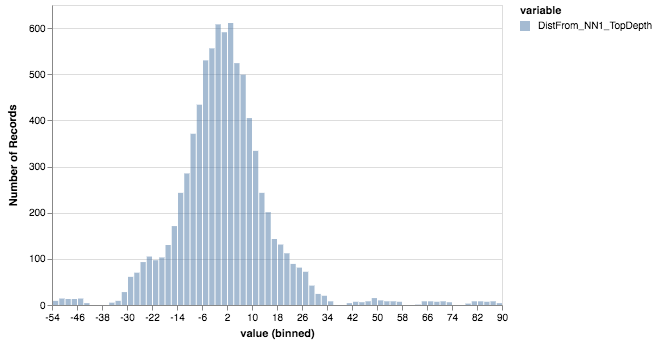

In [63]:
# 'MM_Top_Depth_predBy_NN1thick'
test_df_pred2_TopScratch2 = test_df_pred_onlyTopMCM_class5[['DistFrom_NN1_TopDepth']]
test_df_pred2_TopScratch2.vgplot.hist(bins=100, alpha=0.5)

In [64]:
test_df_pred_onlyTopMCM_class10 = test_df_pred.loc[test_df_pred['new_pick2'] == 10]

In [65]:
print(len(test_df_pred_onlyTopMCM_class10))

133


In [66]:
accuracy_class10 = accuracy_score(test_df_pred_onlyTopMCM_class10['new_pick2'], test_df_pred_onlyTopMCM_class10['Pick_pred'])
accuracy_class10

0.0

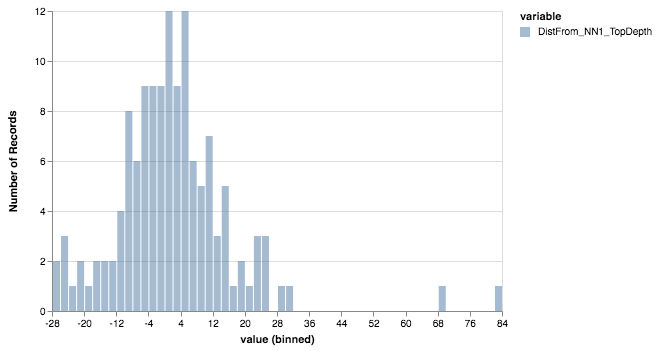

In [67]:
# 'MM_Top_Depth_predBy_NN1thick'
test_df_pred2_TopScratch2 = test_df_pred_onlyTopMCM_class10[['DistFrom_NN1_TopDepth']]
test_df_pred2_TopScratch2.vgplot.hist(bins=100, alpha=0.5)

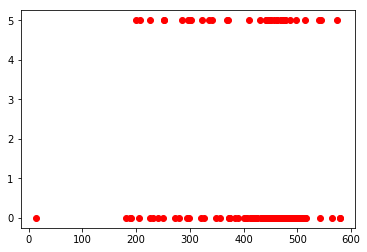

In [68]:
plt.plot(test_df_pred_onlyTopMCM_class10['DEPT'],test_df_pred_onlyTopMCM_class10['Pick_pred'], 'ro')

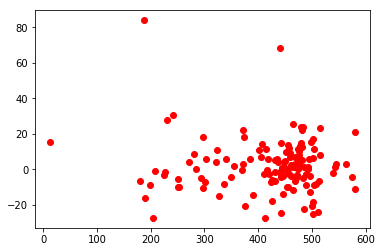

In [69]:
plt.plot(test_df_pred_onlyTopMCM_class10['DEPT'],test_df_pred_onlyTopMCM_class10['DistFrom_NN1_TopDepth'], 'ro')

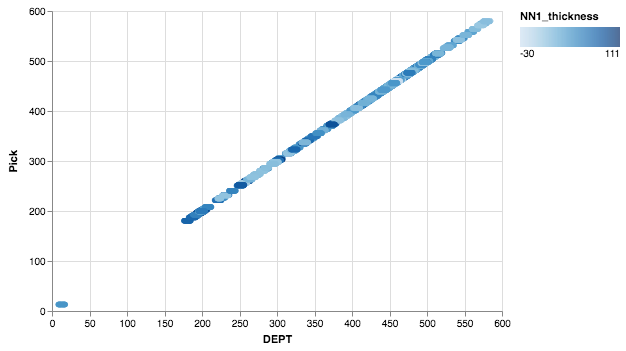

In [70]:
#c='McMurray_Base_DEPTH'
test_df_pred_onlyTopMCM_class5.vgplot(kind='scatter', x='DEPT', y='Pick',c='NN1_thickness')

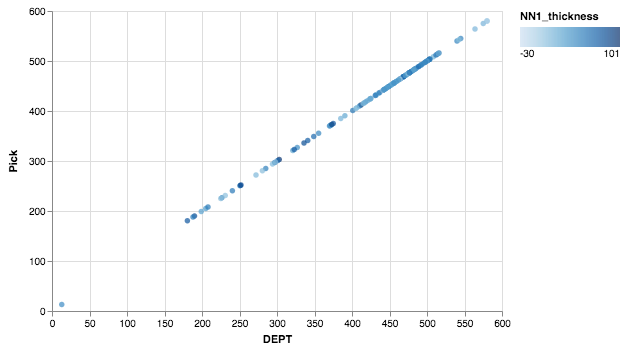

In [71]:
#c='McMurray_Base_DEPTH'
test_df_pred_onlyTopMCM_class10.vgplot(kind='scatter', x='DEPT', y='Pick',c='NN1_thickness')

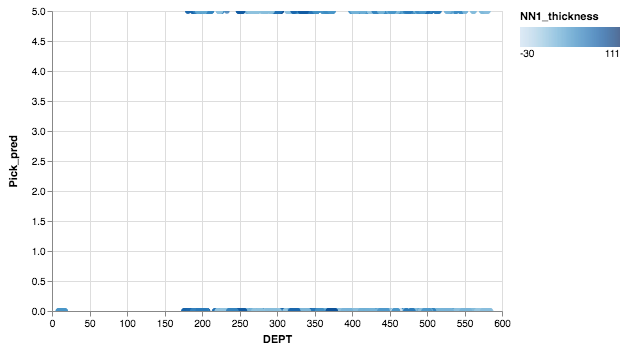

In [72]:
test_df_pred_onlyTopMCM_class5.vgplot(kind='scatter', x='DEPT', y='Pick_pred',c='NN1_thickness')

In [73]:
test_df_pred_onlyTopMCM_class10pred = test_df_pred.loc[test_df_pred['Pick_pred'] == 10]
len(test_df_pred_onlyTopMCM_class10pred)

0

In [74]:
test_df_pred[0:20]

,CALI,COND,DELT,DEPT,DPHI,DT,DistFrom_NN1_TopDepth,GR,GR_max_11winSize_dirabove,GR_max_11winSize_diraround,...,RHOB,SFLU,SP,SitID,UWI,new_pick,new_pick2,new_pick2_paleoz,new_pick_paleoz,Pick_pred
0,NaN,NaN,NaN,300.00,0.266,NaN,184.00,96.484,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,176.00,0,0,248.00,0
1,NaN,NaN,NaN,300.25,0.263,NaN,183.75,97.693,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.75,0,0,247.75,0
2,NaN,NaN,NaN,300.50,0.269,NaN,183.50,98.901,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.50,0,0,247.50,0
3,NaN,NaN,NaN,300.75,0.285,NaN,183.25,97.805,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.25,0,0,247.25,0
4,NaN,NaN,NaN,301.00,0.298,NaN,183.00,96.770,NaN,NaN,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,175.00,0,0,247.00,0
5,NaN,NaN,NaN,301.25,0.304,NaN,182.75,95.191,NaN,98.901,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,174.75,0,0,246.75,0
6,NaN,NaN,NaN,301.50,0.268,NaN,182.50,93.611,NaN,98.901,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,174.50,0,0,246.50,0
7,NaN,NaN,NaN,301.75,0.275,NaN,182.25,93.608,NaN,98.901,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,174.25,0,0,246.25,0
8,NaN,NaN,NaN,302.00,0.276,NaN,182.00,94.452,NaN,97.805,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,174.00,0,0,246.00,0
9,NaN,NaN,NaN,302.25,0.280,NaN,181.75,95.903,NaN,97.531,...,NaN,NaN,NaN,141873,00/10-34-069-05W4/0,173.75,0,0,245.75,0


In [75]:
len(test_df_pred.UWI.unique())

221

In [76]:
idx = test_df_pred.groupby(['SitID'])['Pick_pred'].transform(max) == test_df_pred['Pick_pred']
test_df_pred3=test_df_pred[idx]
        
        


In [77]:
len(test_df_pred3)

65265

In [82]:
#c='McMurray_Base_DEPTH'
test_df_pred3.vgplot(kind='scatter', x='DEPT', y='Pick',c='NN1_thickness')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
